In [211]:
import pandas as pd
from preprocess import load_data_year
import seaborn as sns
import matplotlib.pyplot as plt
from analysis import aggregate_by_country

In [212]:
# Load data
year = 1994
data = load_data_year(year)

In [213]:
data_agg = pd.read_csv('data/aggregated/aggregated_1994.csv')
data_agg.head(1000)

FileNotFoundError: [Errno 2] No such file or directory: 'data/aggregated/aggregated_1994.csv'

# Data analysis
In this section we will perform a general analysis on the data

In [ ]:
sources = ['USA', 'DEU', 'FRA', 'GBR', 'JPN', 'CHN', 'IND', 'BRA', 'RUS', 'IRN']
# Analyze the distribution of the goldstein values
#sns.boxplot(data=data, x='Goldstein')
# Plot goldstein values distribution
sns.histplot(data, x='Goldstein', bins=100, kde=True)
plt.title(f'Goldstein values distribution in year {year}');

In [ ]:
# Count the entries for each source
source_counts = data['Source code'].value_counts()
# Plot the source counts
plt.figure(figsize=(10, 5))
sns.displot(source_counts, bins=50, kde=True)
plt.title(f'Number of entries for each source in year {year}');

## Analysis on aggregated data

In [ ]:
def aggregated_barplot(data, x, y, k):
    data_aggregated = aggregate_by_country(data, x)
    top_k = data_aggregated.sort_values(y, ascending=False).head(k)
    worst_k = data_aggregated.sort_values(y, ascending=True).head(k)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.barplot(data=top_k, x=x, y=y)
    # Verical rotation of the x labels
    plt.xticks(rotation=90)
    plt.title(f'Top {k} {x} in year {year}')
    plt.subplot(1, 2, 2)
    sns.barplot(data=worst_k, x=x, y=y)
    plt.xticks(rotation=90)
    plt.title(f'Worst {k} {x} in year {year}');

In [ ]:
k = 10
self_include = True
data_aggregated_source = aggregate_by_country(data, 'Source code', self_include)
data_aggregated_target = aggregate_by_country(data, 'Target code', self_include)
aggregated_barplot(data, 'Source code', 'Goldstein', k)
aggregated_barplot(data, 'Target code', 'Goldstein', k)

In [ ]:
data_aggregated_source_target = aggregate_by_country(data, ['Source code', 'Target code'], self_include)
# Make pairs aggregation
data_aggregated_source_target['Source-Target'] = data_aggregated_source_target['Source code'] + '-' + data_aggregated_source_target['Target code']
aggregated_barplot(data_aggregated_source_target, 'Source-Target', 'Goldstein', k)

## Centrality analysis

In [40]:
from graph_analysis import compute_centrality
from graph_creation import load_graph_for
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
years = [year for year in range(1979, 2015)]
centrality_measure = 'degree'
map_type = 'only_negative'
nations = {}
for year in years:
    graph = load_graph_for(year, map_type=map_type)
    centrality, _  = compute_centrality(graph, centrality_measure)
    for node, value in centrality.items():
        nations.setdefault(node, {})
        nations[node][year] = value 

In [42]:
# Create a dataframe with the centralities
centralities = pd.DataFrame(nations).T
centralities

,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
IRQ,0.043478,0.166667,0.078947,0.090909,0.011905,0.126582,0.086420,0.101124,0.116279,0.083333,...,0.276119,0.224638,0.222222,0.175676,0.130435,0.134615,0.11875,0.120482,0.124183,0.088
EGY,0.188406,0.090909,0.105263,0.077922,0.071429,0.151899,0.123457,0.078652,0.093023,0.072917,...,0.111940,0.123188,0.091503,0.108108,0.130435,0.134615,0.26875,0.180723,0.169935,0.152
CHE,0.000000,0.030303,0.013158,0.064935,0.047619,0.025316,0.037037,0.033708,0.034884,0.052083,...,0.044776,0.028986,0.058824,0.067568,0.099379,0.083333,0.08750,0.090361,0.084967,0.064
PSE,0.072464,0.075758,0.092105,0.103896,0.083333,0.063291,0.123457,0.123596,0.069767,0.104167,...,0.097015,0.137681,0.117647,0.121622,0.223602,0.121795,0.11250,0.108434,0.058824,0.072
USA,0.492754,0.500000,0.618421,0.597403,0.535714,0.607595,0.654321,0.662921,0.616279,0.552083,...,0.604478,0.666667,0.712418,0.716216,0.763975,0.782051,0.81250,0.807229,0.771242,0.752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00625,0.006024,NaN,NaN
LCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00625,0.006024,NaN,NaN
CYM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006024,NaN,NaN
DMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006024,NaN,NaN


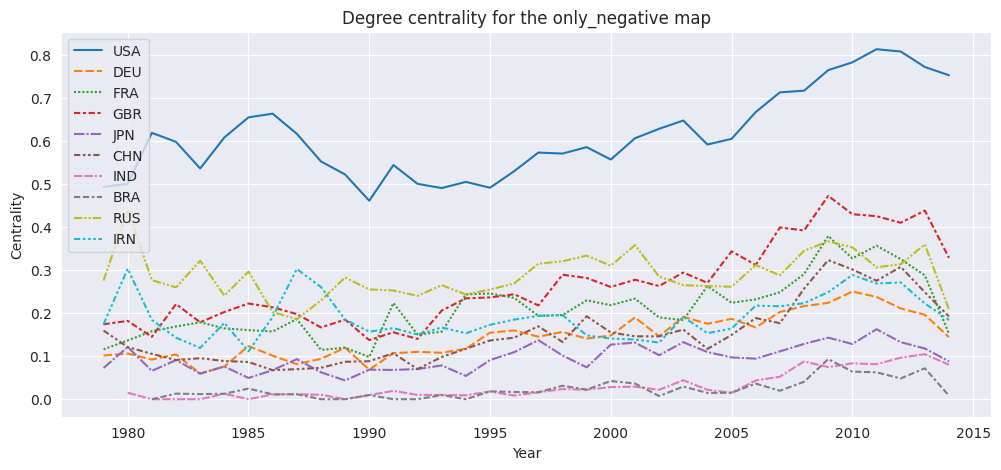

In [43]:
states = ['USA', 'DEU', 'FRA', 'GBR', 'JPN', 'CHN', 'IND', 'BRA', 'RUS', 'IRN']
plt.figure(figsize=(12, 5))
sns.lineplot(data=centralities.loc[states].T)
plt.xlabel('Year')
plt.ylabel('Centrality')
plt.title(f'{centrality_measure.capitalize()} centrality for the {map_type} map')
plt.show()

In [44]:
# Create a two column dataframe with the centralities from nations
df = pd.DataFrame(nations)
df = df.reset_index()
df = pd.melt(df, id_vars='index', var_name='state', value_name='centrality')
df.rename(columns={'index': 'year'}, inplace=True)
df

,year,state,centrality
0,1979,IRQ,0.043478
1,1980,IRQ,0.166667
2,1981,IRQ,0.078947
3,1982,IRQ,0.090909
4,1983,IRQ,0.011905
...,...,...,...
6691,2010,MUS,NaN
6692,2011,MUS,NaN
6693,2012,MUS,NaN
6694,2013,MUS,0.013072


In [45]:
states = ['USA', 'RUS', 'CHN', 'GBR', 'IND']
# Take the countries that we want to analyze
top = df[df['state'].isin(states)]
# Every 5 years
top = top[top['year'] % 3 == 0]

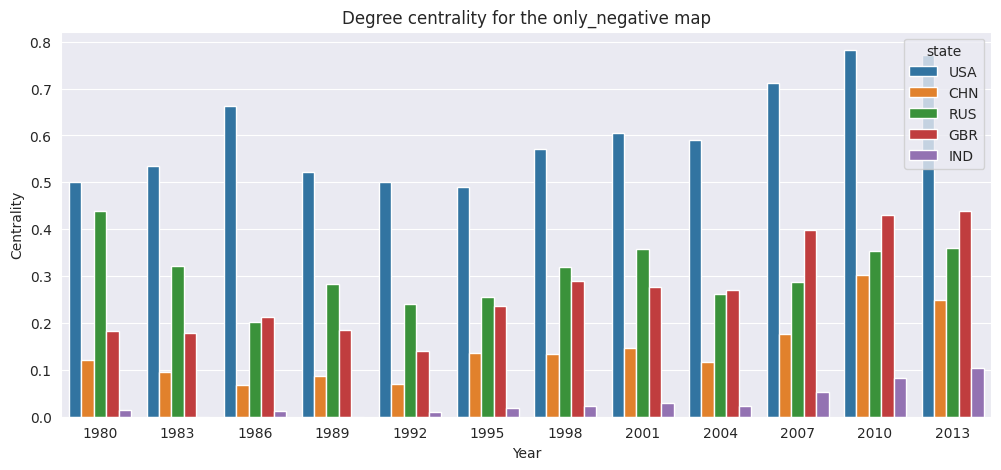

In [46]:
plt.figure(figsize=(12, 5))
sns.barplot(data=top, x='year', y='centrality', hue='state', orient='v')
plt.xlabel('Year')
plt.ylabel('Centrality')
plt.title(f'{centrality_measure.capitalize()} centrality for the {map_type} map')
plt.show()

In [47]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Friendship and enmity analysis

In [48]:
map_type = 'all'
pairs = {}
for year in years:
    graph = load_graph_for(year, map_type=map_type)
    for edge in graph.edges.keys():
        source, target = edge
        pair_name = f'{source}-{target}'
        pairs.setdefault(pair_name, {})
        pairs[pair_name][year] = - graph.edges[edge]["weight"]  if map_type == 'only_negative' else graph.edges[edge]["weight"]
        

In [49]:
## Create a dataframe with the centralities
df_pair = pd.DataFrame(pairs).T
# Fill nan values with 0
df_pair.fillna(0, inplace=True)

# Create a two column dataframe with the centralities from nations
df_pair_noindex = pd.DataFrame(pairs)
df_pair_noindex = df_pair_noindex.reset_index()
df_pair_noindex = pd.melt(df_pair_noindex, id_vars='index', var_name='pair', value_name='weight')
df_pair_noindex.rename(columns={'index': 'year'}, inplace=True)
df_pair_noindex.fillna(0, inplace=True)
df_pair_noindex

,year,pair,weight
0,1979,ISR-FRA,-0.058112
1,1980,ISR-FRA,-0.053184
2,1981,ISR-FRA,0.134189
3,1982,ISR-FRA,-0.383527
4,1984,ISR-FRA,0.325484
...,...,...,...
131287,2012,UGA-TZA,0.000000
131288,2013,UGA-TZA,0.000000
131289,2014,UGA-TZA,0.396473
131290,1983,UGA-TZA,0.000000


In [50]:
selected_pairs = ['USA-AFG', 'USA-CHN', 'USA-GBR', 'USA-IND', 'RUS-CHN', 'RUS-GBR', 'RUS-IND', 'CHN-GBR', 'CHN-IND', 'ISR-PSE']
# Take the countries that we want to analyze
top = df_pair_noindex[df_pair_noindex['pair'].isin(selected_pairs)]
# Every 5 years
top = top[top['year'] % 3 == 0]

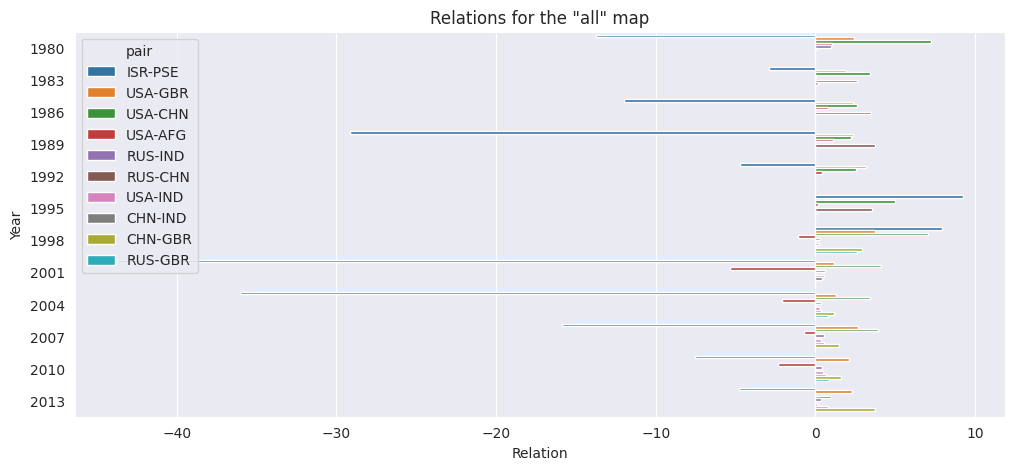

In [51]:
plt.figure(figsize=(12, 5))
sns.barplot(data=top, x='weight', y='year', hue='pair', orient='h')
plt.ylabel('Year')
plt.xlabel('Relation')
plt.title(f'Relations for the "{map_type}" map')
plt.show()

In [89]:
# Create source target pairs
selected_nations = ['USA', 'RUS', 'CHN', "ISR", "PSE", "AFG", "IRN", "IRQ"]
top_k = 10
selected_year = 1994
df_pair_noindex_st = df_pair_noindex.copy()
df_pair_noindex_st['P1'], df_pair_noindex_st['P2'] = df_pair_noindex['pair'].str.split('-', 1).str
df_pair_noindex_st = df_pair_noindex_st[df_pair_noindex_st['year'] == selected_year]
df_pair_noindex_st

/tmp/ipykernel_4822/2393875991.py:6: FutureWarning:

In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.

/tmp/ipykernel_4822/2393875991.py:6: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



,year,pair,weight,P1,P2
13,1994,ISR-FRA,1.135871,ISR,FRA
49,1994,ISR-KWT,0.338803,ISR,KWT
85,1994,ISR-JOR,28.458199,ISR,JOR
121,1994,ISR-SAU,0.613113,ISR,SAU
157,1994,ISR-PSE,4.253034,ISR,PSE
...,...,...,...,...,...
131125,1994,CAF-NGA,0.000000,CAF,NGA
131161,1994,IND-UGA,0.000000,IND,UGA
131197,1994,ESP-PAN,0.000000,ESP,PAN
131233,1994,CHL-COL,0.000000,CHL,COL


In [53]:
import plotly.graph_objects as go

In [97]:
def plot_pairs(df, k, title='Worst'):
    # Plot the worst pairs
    fig = go.Figure()
    # Take the first element for each year
    
    for i in range(k):
        values = []
        pairs = []
        for year in df['year'].unique():
            data = df[df['year'] == year]
            data = data.reset_index()
            values.append(data['weight'].iloc[i])
            pairs.append(data['pair'].iloc[i])
        fig.add_trace(go.Bar(x=df['year'].unique(), y=values, text=pairs))
    # Hide the legend
    fig.update_layout(barmode='group', xaxis={'categoryorder':'array', 'categoryarray':years}, showlegend=False)
    # Set the title
    fig.update_layout(title=f'{title} {k} pairs for each year')
    # Set labels
    fig.update_xaxes(title_text='Year')
    fig.update_yaxes(title_text='Weight')
    fig.show()


In [98]:
# For each year we select the worse 10 pairs
k = 3
# Take every 5 years
worst_pairs = df_pair_noindex[df_pair_noindex['year'] % 5 == 0]
worst_pairs = worst_pairs.groupby('year').apply(lambda x: x.nsmallest(k, 'weight'))
worst_pairs = worst_pairs.reset_index(drop=True)
# Sort by year
worst_pairs = worst_pairs.sort_values('year')
# Plot the worst pairs  
plot_pairs(worst_pairs, k, title='Worst')

# Top pairs
top_pairs = df_pair_noindex[df_pair_noindex['year'] % 5 == 0]
top_pairs = top_pairs.groupby('year').apply(lambda x: x.nlargest(k, 'weight'))
top_pairs = top_pairs.reset_index(drop=True)
# Sort by year
top_pairs = top_pairs.sort_values('year')
# Plot the worst pairs
plot_pairs(top_pairs, k, title='Top')
